In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
! git clone https://github.com/CSSEGISandData/COVID-19.git || (cd COVID-19/ && git pull)

fatal: le chemin de destination 'COVID-19' existe déjà et n'est pas un répertoire vide.
remote: Enumerating objects: 550, done.
remote: Counting objects: 100% (550/550), done.
remote: Total 2582 (delta 550), reused 550 (delta 550), pack-reused 2032
Réception d'objets: 100% (2582/2582), 33.11 MiB | 2.52 MiB/s, fait.
Résolution des deltas: 100% (1703/1703), complété avec 28 objets locaux.
Depuis https://github.com/CSSEGISandData/COVID-19
   fa735795..865c933c  master     -> origin/master
 * [nouvelle branche]  CSSEGISandData-patch-02042020 -> origin/CSSEGISandData-patch-02042020
   0135250c..d75420b1  web-data   -> origin/web-data
Mise à jour fa735795..865c933c
Fast-forward
 csse_covid_19_data/README.md                       |   24 +
 csse_covid_19_data/UID_ISO_FIPS_LookUp_Table.csv   | 3569 ++++++++++++++++++++
 .../csse_covid_19_daily_reports/03-27-2020.csv     | 3430 +++++++++++++++++++
 .../csse_covid_19_daily_reports/03-28-2020.csv     | 3431 +++++++++++++++++++
 .../csse_covid_19_d

# Confirmed cases

In [49]:
#df = pd.read_csv('COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
df = pd.read_csv('COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df

Province/State  Country/Region        Lat       Long  \
0                                  NaN     Afghanistan  33.000000  65.000000   
1                                  NaN         Albania  41.153300  20.168300   
2                                  NaN         Algeria  28.033900   1.659600   
3                                  NaN         Andorra  42.506300   1.521800   
4                                  NaN          Angola -11.202700  17.873900   
..                                 ...             ...        ...        ...   
257                                NaN          Malawi -13.254308  34.301525   
258  Falkland Islands (Islas Malvinas)  United Kingdom -51.796300 -59.523600   
259          Saint Pierre and Miquelon          France  46.885200 -56.315900   
260                                NaN     South Sudan   6.877000  31.307000   
261                                NaN  Western Sahara  24.215500 -12.885800   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  3/27/20  \
0          0        0        0        0        0        0  ...      110   
1          0        0        0        0        0        0  ...      186   
2          0        0        0        0        0        0  ...      409   
3          0        0        0        0        0        0  ...      267   
4          0        0        0        0        0        0  ...        4   
..       ...      ...      ...      ...      ...      ...  ...      ...   
257        0        0        0        0        0        0  ...        0   
258        0        0        0        0        0        0  ...        0   
259        0        0        0        0        0        0  ...        0   
260        0        0        0        0        0        0  ...        0   
261        0        0        0        0        0        0  ...        0   

     3/28/20  3/29/20  3/30/20  3/31/20  4/1/20  4/2/20  4/3/20  4/4/20  \
0        110      120      170      174     237     273     281     299   
1        197      212      223      243     259     277     304     333   
2        454      511      584      716     847     986    1171    1251   
3        308      334      370      376     390     428     439     466   
4          5        7        7        7       8       8       8      10   
..       ...      ...      ...      ...     ...     ...     ...     ...   
257        0        0        0        0       0       3       3       4   
258        0        0        0        0       0       0       0       1   
259        0        0        0        0       0       0       0       0   
260        0        0        0        0       0       0       0       0   
261        0        0        0        0       0       0       0       0   

     4/5/20  
0       349  
1       361  
2      1320  
3       501  
4        14  
..      ...  
257       4  
258       2  
259       1  
260       1  
261       4  

[262 rows x 79 columns]

In [50]:
def data(df, country):
    return np.sum(df[df['Country/Region']==country].values[:,4:],0)
dates  = df.columns[4:]

def plot_double_every(days, y=0.15):
    x = np.arange(0,60)
    plt.plot(y*(2**(1/days))**x, '--', label='Doubles every {} days'.format(days))



(20, 1000000.0)

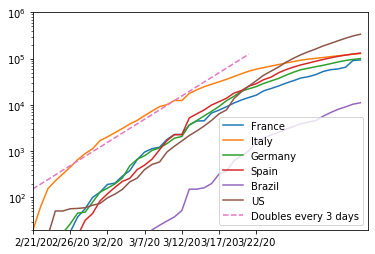

In [51]:
for country in ['France','Italy','Germany','Spain','Brazil','US']:
    plt.semilogy(data(df, country), label=country)
plot_double_every(3)
plt.legend()

xticks_values = np.arange(30, 65, step=5)
xticks_names = [dates[i] for i in xticks_values]
plt.xticks(xticks_values, xticks_names)

plt.xlim([30,len(dates)])
plt.ylim([20,1e6])

## Confirmed cases: France and Germany are 8 days late compared to Italy

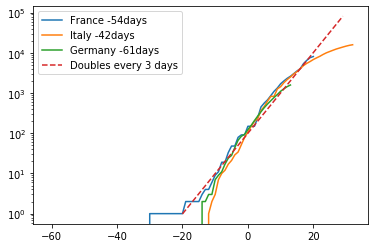

In [66]:
def plot_delta(df, country, delta):
    y = data(df, country)
    x = np.arange(0,len(y))-delta
    plt.semilogy(x, y, label='{} -{}days'.format(country,delta))
def plot_normalized(df, country, depart=100):
    y = data(df, country)
    delta = next((i for i,x in enumerate(y) if x>depart))
    plt.semilogy(np.arange(0,len(y))-delta, y, label='{} -{}days'.format(country,delta))
def plot_double_every_normalized(days, depart=100):
    x = np.arange(-20,30)
    plt.plot(x,depart*(2**(1/days))**x, '--', label='Doubles every {} days'.format(days))

for country in ['France','Italy','Germany']:
    plot_normalized(df, country)
plot_double_every_normalized(3)
plt.legend()

# Deaths

In [67]:
#df = pd.read_csv('COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
df = pd.read_csv('COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
dates  = df.columns[4:]

(1, 10000.0)

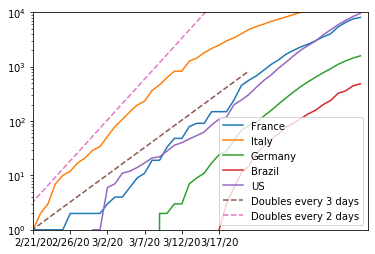

In [68]:
for country in ['France','Italy','Germany','Brazil','US']:
    plt.semilogy(data(df, country), label=country)
plot_double_every(3, .001)
plot_double_every(2, .0001)
plt.legend()

xticks_values = np.arange(30, 60, step=5)
xticks_names = [dates[i] for i in xticks_values]
plt.xticks(xticks_values, xticks_names)

plt.xlim([30,len(dates)])
plt.ylim([1,1e4])

## Synchronization: France is 10 days later, Germany is 18 later


(10, 100000.0)

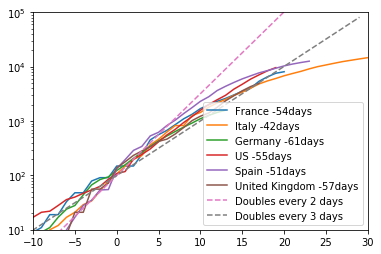

In [73]:
for country in ['France','Italy','Germany','US','Spain','United Kingdom']:
    plot_normalized(df, country,100)
plot_double_every_normalized(2)
plot_double_every_normalized(3)
plt.legend()

plt.xlim(-10,30)
plt.ylim(10,1e5)